<a href="https://colab.research.google.com/github/parastooshrf/fMRI-preprocessing/blob/main/training_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install nibabel nilearn matplotlib


sub-05_ses-retest_task-fingerfootlips_bold.nii  shape: (64, 64, 30, 184)


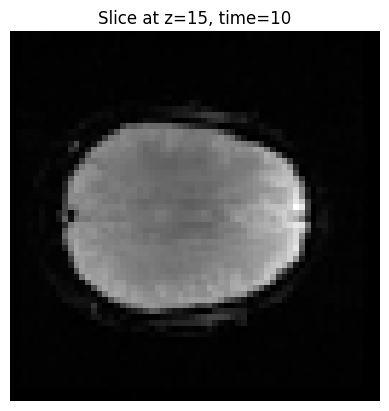

In [18]:
import nibabel as nib
from nilearn import plotting
import matplotlib.pyplot as plt
import numpy as np
import os

# NIFTI file path
fmri_dir = '/content/drive/MyDrive/fMRI'
fMRI = ['10_finger_foot_lips.nii', 'sub-02_ses-retest_task-fingerfootlips_bold.nii', 'sub-03_ses-retest_task-fingerfootlips_bold.nii', 'sub-04_ses-retest_task-fingerfootlips_bold.nii', 'sub-05_ses-retest_task-fingerfootlips_bold.nii']
all_data = []

for file in fMRI:
  path = os.path.join(fmri_dir, file)
  img = nib.load(path)
  data = img.get_fdata()
  all_data.append(data)

print(f"{file}  shape: {data.shape}")
selected_index = 3
data = all_data[selected_index]

# select time point and slice index
timepoint = 10
z_slice = data.shape[2]// 2

# display the selected slice

plt.imshow(data[:, :, data.shape[2]//2, timepoint], cmap='gray')
plt.title(f"Slice at z={z_slice}, time={timepoint}")
plt.axis('off')
plt.show()

/tmp/ipython-input-3346206674.py:7: UserWarning: Casting data from int32 to float32
  plotting.plot_epi(img.slicer[..., 10], title='Original Image (t=10)')


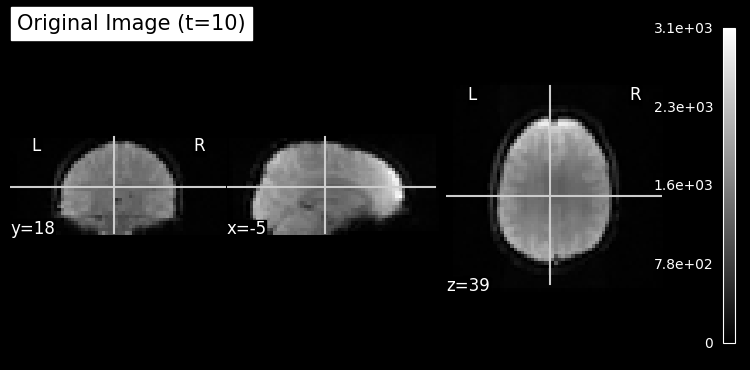

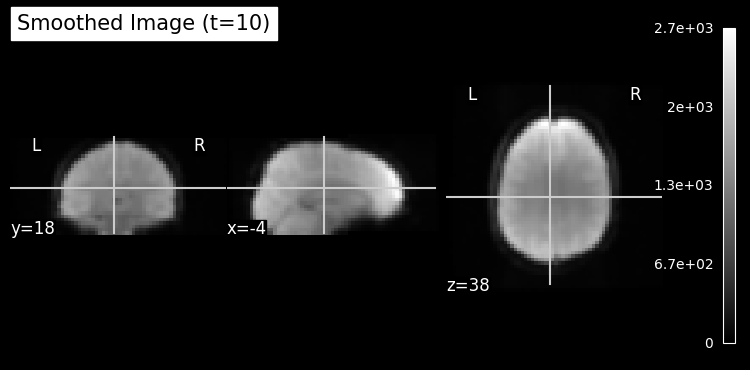

In [19]:
from nilearn import image, plotting

# apply smoothing with a Gaussian kernel (FWHM = 6 mm)
smoothed_img = image.smooth_img(img, fwhm=6)

# Plot smoothed vs original
plotting.plot_epi(img.slicer[..., 10], title='Original Image (t=10)')
plotting.plot_epi(smoothed_img.slicer[..., 10], title='Smoothed Image (t=10)')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [34]:
# Apply smoothing to create "clean" version
from nilearn import image
import numpy as np

smoothed_img = image.smooth_img(img, fwhm=6)
smoothed_data = smoothed_img.get_fdata()

# select a few slices and time points
z_slice = data.shape[2]//2            #middle slice
num_timepoints = [10,20,30,40,50]
# reset X and Y to empty lists every time
X = [] #noisy
Y = [] #clean
print (type(X))
print (type(Y))
for data in all_data:
  num_timepoints = data.shape[3]
  z_slice = data.shape[2]//2            #middle slice
for t in range(num_timepoints):
  noisy_slice = data[:, :, z, t]
  clean_slice = smoothed_data[:, :, z, t]

# Normalize between 0 and 1
noisy_norm = (noisy_slice - noisy_slice.min()) / (noisy_slice.max() - noisy_slice.min())
clean_norm = (clean_slice - clean_slice.min()) / (clean_slice.max() - clean_slice.min())

noise = 0.1 * np.random.randn(*clean_slice.shape)
noisy_slice = clean_slice + noise
noisy_slice = np.clip(noisy_slice, 0., 1.)


X.append(noisy_norm)
Y.append(clean_norm)

  #Convert to numpy array and add channel dim
X = np.array(X)[..., np.newaxis]
Y = np.array(Y)[..., np.newaxis]

print(" Total samples: ", len(X))
print(" X shape : ", X.shape)
print(" Y shape : ", Y.shape)

<class 'list'>
<class 'list'>
 Total samples:  1
 X shape :  (1, 64, 64, 1)
 Y shape :  (1, 64, 64, 1)


In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state= 42)

# Define a simple CNN model
model = models.Sequential([layers.Input(shape=(64,64,1)), layers.Conv2D(32, (3,3), activation='relu', padding='same'),layers.Conv2D(32, (3,3), activation='relu', padding='same'),layers.Conv2D(1, (3,3), activation='sigmoid',padding='same')])
model.compile(optimizer='adam', loss='mse')

# Train the Model
history = model.fit (X_train, Y_train, validation_data = (X_val, Y_val), epochs=20, batch_size=2, validation_split= 0.2)

ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [24]:
print(len(X), len(Y))

1 1
